# Deep Learning Model

In [2]:
#Import libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

C:\Users\pc\miniconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\pc\miniconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\pc\miniconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


## 1. Import dataset from Kaggle

In [3]:
dt=pd.read_csv("C:/Users/pc/Desktop/bank.csv",delimiter=";")

In [4]:
dt.shape

(1087, 16)

In [1090]:
#Import libraries

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [5]:
dt.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
y            object
dtype: object

### Data preparation

In [6]:
dt['y'].replace(to_replace=['yes','no'], value=[1,0], inplace=True)

In [7]:
dt.groupby(['contact'])['y'].value_counts(normalize=True)

contact    y
cellular   1    0.550993
           0    0.449007
telephone  1    0.536585
           0    0.463415
unknown    0    0.756000
           1    0.244000
Name: y, dtype: float64

In [8]:
dt["job"]=dt["job"].astype('category')
dt["job"]=dt["job"].cat.codes

In [9]:
dt["marital"]=dt["marital"].astype('category')
dt["marital"]=dt["marital"].cat.codes

In [10]:
dt["education"]=dt["education"].astype('category')
dt["education"]=dt["education"].cat.codes

In [11]:
dt["default"]=dt["default"].astype('category')
dt["default"]=dt["default"].cat.codes

In [12]:
dt["housing"]=dt["housing"].astype('category')
dt["housing"]=dt["housing"].cat.codes

In [13]:
dt["loan"]=dt["loan"].astype('category')
dt["loan"]=dt["loan"].cat.codes

In [14]:
dt["contact"]=dt["contact"].astype('category')
dt["contact"]=dt["contact"].cat.codes

In [15]:
dt["month"]=dt["month"].astype('category')
dt["month"]=dt["month"].cat.codes

In [16]:
dt.dtypes

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month         int8
duration     int64
campaign     int64
pdays        int64
previous     int64
y            int64
dtype: object

In [17]:
# Features
X=dt[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous']]

In [18]:
# Target
y=dt['y']

### Data processing

In [19]:
# libraries for data processing
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [20]:
#normalization
X=StandardScaler().fit_transform(X)

In [21]:
# Split data to train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [22]:
X_train.shape

(869, 15)

In [23]:
y_train=np.asmatrix(y_train)

In [24]:
y_train.shape

(1, 869)

## 2. Deep Model: Algorithm

In [25]:
# weights initialization
def weights_init(layers_dim):
    params = {}
    
    n = len(layers_dim)
    for i in range(1, n):
        params['W' + str(i)] = np.random.randn(layers_dim[i], layers_dim[i-1])*0.01
        params['b' + str(i)] = np.zeros((layers_dim[i], 1))
    return params

In [26]:
# activation functions
def sigmoid(x):
    return 1/(1 + np.exp(-x))


def relu(x):
    return np.maximum(x, 0)

In [27]:
# Marche forward
def forward(X, params):
    # intermediate layer use relu as activation
    # last layer use sigmoid
    n_layers = int(len(params)/2)
    A = X
    cache = {}
    for i in range(1, n_layers):
        W, b = params['W'+str(i)], params['b'+str(i)]
        Z = np.dot(W, A) + b
        A = relu(Z)
        cache['Z'+str(i)] = Z
        cache['A'+str(i)] = A
    
    # last layer
    W, b = params['W'+str(i+1)], params['b'+str(i+1)]
    Z = np.dot(W, A) + b
    A = sigmoid(Z)
    cache['Z'+str(i+1)] = Z
    cache['A'+str(i+1)] = A
    
    return cache, A 

In [28]:
#Cost function
def compute_cost(A, Y):
    """
    For binary classification, both A and Y would have shape (1, m), where m is the batch size
    """
    assert A.shape == Y.shape
    m = A.shape[1]
    s = np.dot(Y, np.log(A.T)) + np.dot(1-Y, np.log((1 - A).T))
    loss = -s/m
    return np.squeeze(loss)

In [29]:
#activation function derivatives

def sigmoid_grad(A, Z):
    grad = np.multiply(A, 1-A)
    return grad


def relu_grad(A, Z):
    grad = np.zeros(Z.shape)
    grad[Z>0] = 1
    return grad

In [34]:
def backward(params, cache, X, Y):
    """
    params: weight [W, b]
    cache: result [A, Z]
    Y: shape (1, m)
    """
    grad = {}
    n_layers = int(len(params)/2)
    m = Y.shape[1]
    cache['A0'] = X
    
    for l in range(n_layers, 0, -1):
        A, A_prev, Z = cache['A' + str(l)], cache['A' + str(l-1)], cache['Z' + str(l)]
        W = params['W'+str(l)]

        if l == n_layers:
            dA = -np.divide(Y, A) + np.divide(1 - Y, 1 - A)
        
        if l == n_layers:
            dZ = np.multiply(dA, sigmoid_grad(A, Z))
        else:
            dZ = np.multiply(dA, relu_grad(A, Z))
            
        dW = np.dot(dZ, np.transpose(A_prev))/m
        db = np.sum(dZ, axis=1)/m
        dA = np.dot(np.transpose(W), dZ)
        

        grad['dW'+str(l)] = dW
        grad['db'+str(l)] = db
    
    return grad

In [33]:
def optimize(params, grads, lr):
    n_layers = int(len(params)/2)
    for i in range(1, n_layers+1):
        dW, db = grads['dW'+str(i)], grads['db'+str(i)]
        params['W'+str(i)] -= lr*dW
        params['b'+str(i)] -= lr*db
    return params

### Training DL Model

In [38]:
Loss=[]
P=weights_init([15,3,1])
for i in range(1000):
    cache, A=forward(np.transpose(X_train),P)
    grads=backward(P,cache,np.transpose(X_train),y_train)
    P=optimize(P,grads,0.1)
    Loss.append(compute_cost(A, y_train))

In [39]:
Loss=np.asarray(Loss)

### Draw Loss Function

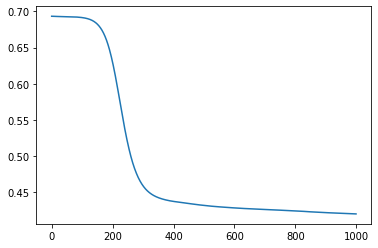

In [40]:
x=[]
for i in range(0,Loss.shape[0]):
    x.append(i)

y=[]
for i in range(0,Loss.shape[0]):
    y.append(Loss[i,0])

plt.plot(x,y)

## 3. Model Evaluation

In [42]:
cache_pred, y_pred=forward(np.transpose(X_test),P)
y_test=np.asmatrix(y_test)
n=y_test.shape[1]
TP=0
FN=0
FP=0



for i in range(n):
    if (y_pred[0,i]>0.5) and (y_test[0,i]==1):
        TP=TP+1
for i in range(n):
    if (y_pred[0,i]<=0.5) and (y_test[0,i]==1):
        FN=FN+1
for i in range(n):
    if (y_pred[0,i]>0.5) and (y_test[0,i]==0):
        FP=FP+1
precision=TP/(TP+FP)
recall=TP/(TP+FN)
F1=(2*precision*recall)/(precision+recall)

print("Accuarcy of this model is:",F1)

Accuarcy of this model is: 0.7596153846153847
